In [1]:
import itertools
import matplotlib.pyplot as plt

import cv2
import numpy as np
import os

import tensorflow as tf
from tensorflow.keras.models import load_model, Sequential

In [2]:
model = load_model(os.path.join("Models", "Tensorflow_Video.keras"))

In [3]:
model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_50 (Conv2D)              │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_50 (MaxPooling2D) │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (None, 72, 72, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_51 (MaxPooling2D) │ (None, 36, 36, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (None, 34, 34, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_52 (MaxPooling2D) │ (None, 17, 17, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ (None, 9248)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 9248)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 512)            │     4,735,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,234,846 (54.30 MB)

 Trainable params: 4,744,948 (18.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,489,898 (36.20 MB)

In [23]:
# Trained intermediate layers.
intermediate_layers = model.layers[:3]

In [24]:
intermediate_model = Sequential(intermediate_layers)
intermediate_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_50 (Conv2D)              │ (1, 510, 510, 16)      │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_50 (MaxPooling2D) │ (1, 255, 255, 16)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (1, 253, 253, 16)      │         2,320 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,768 (10.81 KB)

 Trainable params: 2,768 (10.81 KB)

 Non-trainable params: 0 (0.00 B)

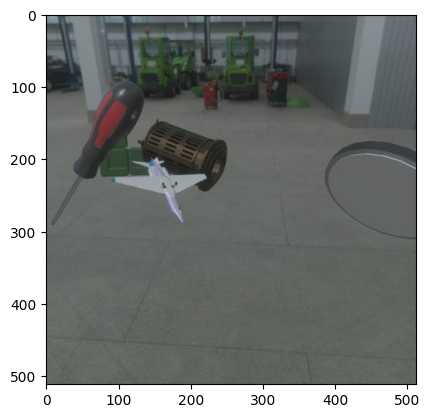

In [25]:
# Loading the image.
# image = cv2.imread("Data/Synthetic/CombWrench/3_img.jpg")
image = cv2.imread("Data/Synthetic/Screwdriver/17236_img.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
resize = cv2.resize(image, (512,512))

plt.imshow(resize)
plt.show()

In [26]:
yhat = intermediate_model.predict(np.expand_dims(resize, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


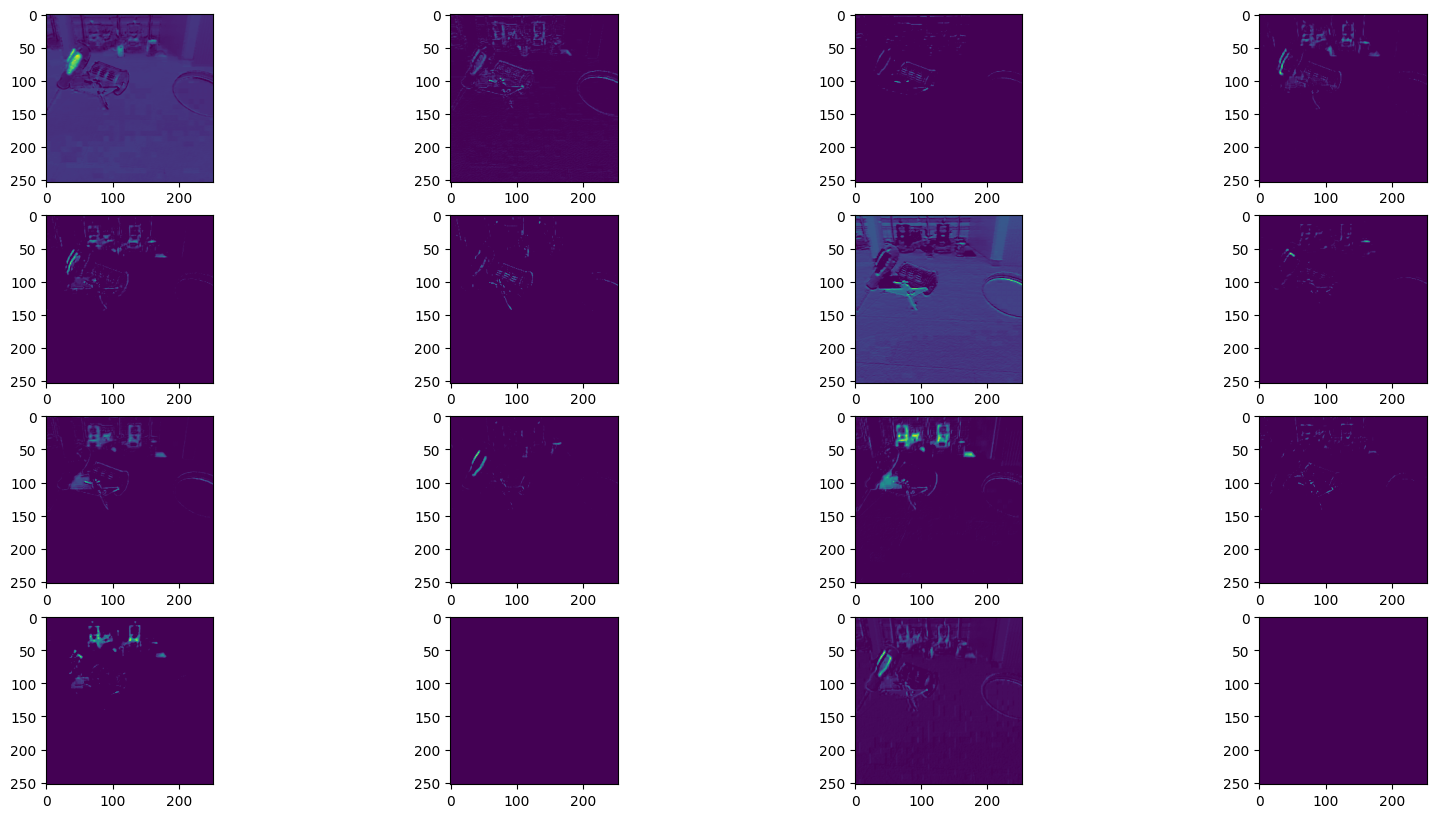

In [28]:
# Visualization Grid.
num_rows = 4
num_cols = 4

fig, ax = plt.subplots(ncols=num_cols, nrows=num_rows, figsize=(20,10))
for idx, ax_idx in enumerate(list(itertools.product(range(num_cols), range(num_rows)))):
    ax[ax_idx[1], ax_idx[0]].imshow(yhat[0, :, :, idx])